In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
emdat = pd.read_csv('emdat.csv')

# 災害データ分析とストーリーテリング

## 0. このノートでやること

このノートでは、EM-DAT（Emergency Events Database）の災害データを使って、
「災害の種類」に注目した分析を行う。

特に次の3つの点に着目する。

- どの災害タイプがよく発生しているのか（発生件数）
- どの災害タイプがより多くの死者を出しているのか（死者数）
- 世界のどのあたりで災害が発生しているのか（発生地点と時期）

まず災害タイプごとの発生件数を調べて、
世界でどの種類の災害が頻繁に起きているのかを確認する。

次に、災害タイプごとの死者数の合計を調べて、
「よく起きる災害」と「人命への影響が大きい災害」が同じなのかどうかを考える。

さらに、発生年と緯度・経度を使って、
世界のどの地域で災害が起きているのかを期間ごとに可視化し、
時間の経過による変化もあわせて確認する。

グラフや集計結果をもとに、
災害の頻度だけでなく、人への被害や発生地点という視点からも災害の特徴を整理し、
最後に今回の分析から感じたことや学んだことをまとめる。



## 1. 使用するデータについて

このノートブックでは、EM-DAT（Emergency Events Database）から作成された  
`emdat.csv` という災害データセットを使う。

1行が「1つの災害イベント（ある年・ある国で起きたある種類の災害）」を表している。

主な列は次のとおり。

- `Disaster Subgroup`：災害の大まかなグループ
- `Disaster Type`：災害の種類（Flood, Storm, Earthquake など）
- `Disaster Subtype`：災害の細かい分類
- `ISO`：国を表す3文字コード（JPN, USA など）
- `Country`：国名
- `Subregion`：より細かい地域区分
- `Region`：大きな地域（Asia, Americas など）
- `Latitude`：緯度
- `Longitude`：経度
- `Start Year`：災害が発生した年
- `Total Deaths`：その災害による死者数


In [2]:
# データの基本情報を確認
print("データの形状（行数, 列数）:", emdat.shape)
print()

print("列名一覧:")
print(emdat.columns)
print()

# 先頭5行を表示
emdat.head()


データの形状（行数, 列数）: (17278, 11)

列名一覧:
Index(['Disaster Subgroup', 'Disaster Type', 'Disaster Subtype', 'ISO',
       'Country', 'Subregion', 'Region', 'Latitude', 'Longitude', 'Start Year',
       'Total Deaths'],
      dtype='object')



,Disaster Subgroup,Disaster Type,Disaster Subtype,ISO,Country,Subregion,Region,Latitude,Longitude,Start Year,Total Deaths
0,Meteorological,Storm,Tropical cyclone,USA,United States of America,Northern America,Americas,NaN,NaN,1900,6000.0
1,Hydrological,Flood,Flood (General),JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,300.0
2,Biological,Epidemic,Viral disease,JAM,Jamaica,Latin America and the Caribbean,Americas,NaN,NaN,1900,30.0
3,Geophysical,Volcanic activity,Ash fall,JPN,Japan,Eastern Asia,Asia,NaN,NaN,1900,30.0
4,Geophysical,Earthquake,Ground movement,TUR,Türkiye,Western Asia,Asia,40.3,43.1,1900,140.0


## 2. 災害の種類ごとの件数を調べる

このデータには、Flood（洪水）やStorm（嵐）、Earthquake（地震）など、
さまざまな種類の災害が含まれている。

まずは、`Disaster Type` 列を使って、
どの種類の災害がどれくらいの件数発生しているのかを確認する。

ここでは、災害タイプごとの件数を集計し、
件数が多い順に並べて上位のタイプを見てみる。


In [3]:
# 災害タイプごとの件数を集計
type_counts = emdat["Disaster Type"].value_counts()

print("災害タイプごとの件数（多い順に上から表示）")
print(type_counts.head())


災害タイプごとの件数（多い順に上から表示）
Disaster Type
Flood                  6014
Storm                  4857
Earthquake             1624
Epidemic               1503
Mass movement (wet)     846
Name: count, dtype: int64


### 災害タイプごとの件数を棒グラフで可視化する

集計した結果だけだと数字の一覧なので、直感的には少し分かりにくい。

そこで、件数が多い災害タイプの上位を取り出して、
棒グラフにして見てみる。

グラフにすることで、

- どの災害タイプが特に多いか
- 上位どうしの差がどれくらいあるか

をイメージしやすくする。


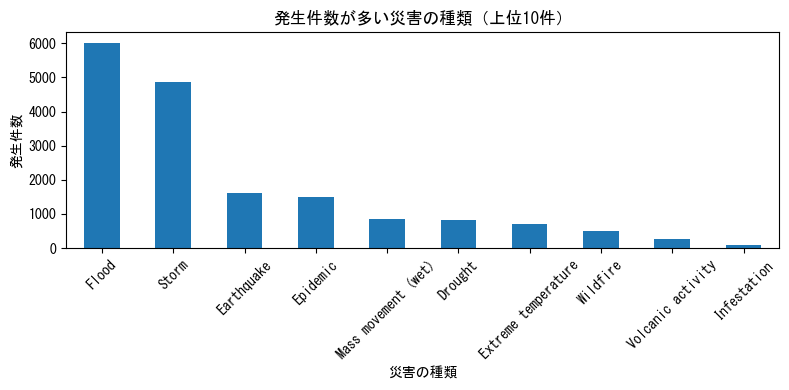

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# 日本語フォントの設定
plt.rcParams["font.family"] = "MS Gothic"
plt.rcParams["axes.unicode_minus"] = False

# データの読み込み
emdat = pd.read_csv("emdat.csv")

# 災害タイプごとの件数を集計
type_counts = emdat["Disaster Type"].value_counts()

# 件数が多い災害タイプの上位10種類を取得
top_types = type_counts.head(10)

# 棒グラフの作成
plt.figure(figsize=(8, 4))
top_types.plot(kind="bar")

plt.xlabel("災害の種類")
plt.ylabel("発生件数")
plt.title("発生件数が多い災害の種類（上位10件）")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 災害タイプごとの発生件数からわかること

上の棒グラフは、災害の種類ごとの発生件数を多い順に並べたものである。

グラフを見ると、特定の災害タイプに件数が集中していることが分かる。
一方で、発生件数が少ない災害タイプもあり、災害の種類によって発生頻度にかなり差があることが確認できる。

この結果から、

- 世界全体で頻繁に起きている災害の種類があること
- 逆に、あまり起きないが記録として残っている災害もあること

が分かる。

ただし、このグラフは「件数」だけを見たものなので、
人への被害の大きさ（死者数や被災者数）までは分からない。
そのため、次は災害の種類ごとに「死者数」に注目して、被害の大きさを比較してみる。


## 3. 災害の種類ごとの死者数を調べる

前のグラフでは、「どの災害タイプがよく発生しているか」という点を、
件数の多さで確認した。

しかし、発生件数が多い災害タイプが、
必ずしも「人への被害が大きい災害タイプ」とは限らない。

そこで次に、`Total Deaths` 列を使って、
災害の種類ごとの「死者数の合計」を集計し、
どの災害タイプがより多くの死者を出しているのかを確認する。


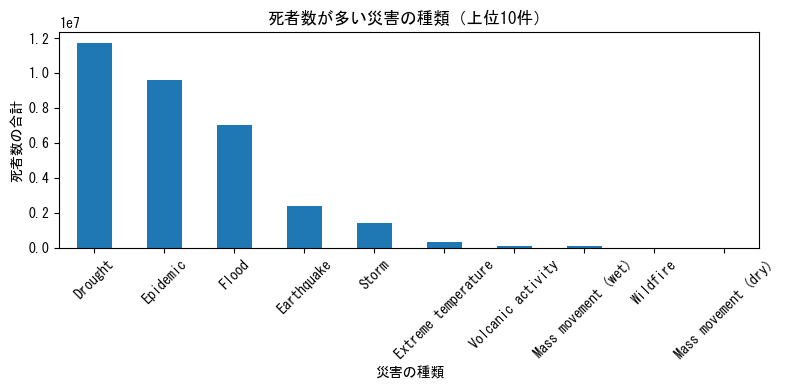

In [9]:
# 災害タイプごとの総死者数を集計して、多い順に並べる
death_by_type = (
    emdat.groupby("Disaster Type")["Total Deaths"]
    .sum()
    .sort_values(ascending=False)
)

# 上位10種類を取り出す
top_death_types = death_by_type.head(10)

# 棒グラフで表示
plt.figure(figsize=(8, 4))
top_death_types.plot(kind="bar")

plt.xlabel("災害の種類")
plt.ylabel("死者数の合計")
plt.title("死者数が多い災害の種類（上位10件）")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 災害タイプごとの死者数からわかること

上の棒グラフは、災害の種類ごとに `Total Deaths`（死者数）を合計し、
死者数が多い災害タイプの上位10件を並べたものである。

前のグラフでは「発生件数」の多い災害タイプを見たが、
今回のグラフでは「死者数」が多い災害タイプを見ているため、
順位や上位に入ってくる種類が異なっていることが分かる。

このことから、

- よく発生する災害タイプと、
  多くの死者を出しやすい災害タイプは必ずしも同じではないこと
- 発生件数が少なくても、1回あたりの被害が大きい災害がある可能性があること

が読み取れる。

つまり、災害を考えるときには、
「どれくらいの頻度で起きるか」という視点だけでなく、
「1回の災害でどれだけ人命に影響が出ているか」という視点も重要になると感じた。


## 4. 世界の災害発生地点を期間ごとに可視化する

ここでは、緯度（Latitude）と経度（Longitude）を使って、
世界のどこで災害が起きているのかを確認する。

EM-DAT のデータには、各災害イベントの発生年（Start Year）と
発生地点の緯度・経度が記録されている。

時間の変化をざっくり見るために、ここでは発生年を次の4つの期間に分ける。

- 1950〜1969年
- 1970〜1989年
- 1990〜2009年
- 2010〜2024年

それぞれの期間について、世界全体の災害の発生地点を
緯度・経度の平面上に点でプロットし、
よく出てくる災害タイプを色分けして表示する。


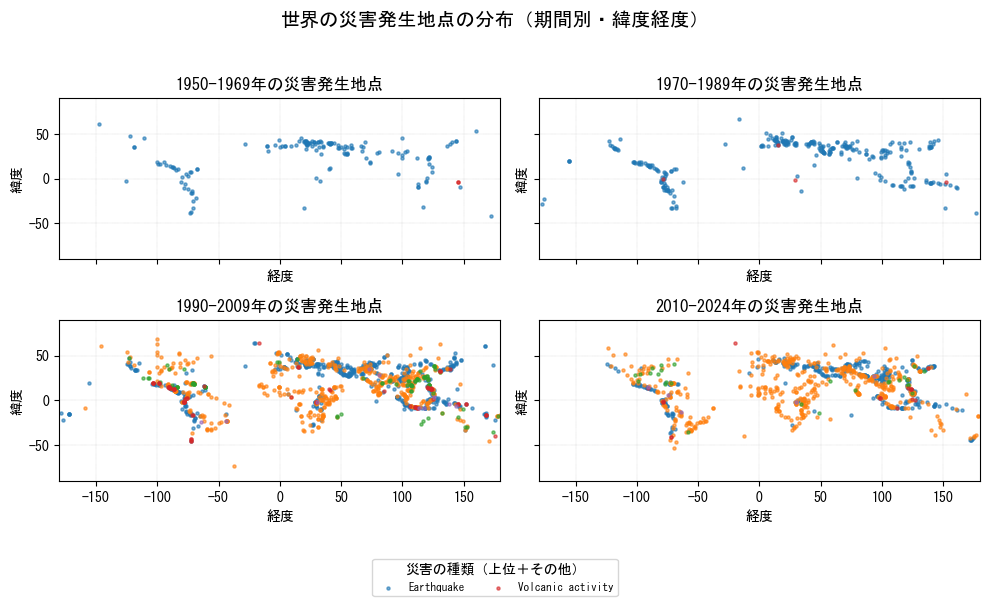

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 必要な列をコピーして数値型にそろえる
df_map = emdat.copy()
df_map["Start Year"] = pd.to_numeric(df_map["Start Year"], errors="coerce")
df_map["Latitude"] = pd.to_numeric(df_map["Latitude"], errors="coerce")
df_map["Longitude"] = pd.to_numeric(df_map["Longitude"], errors="coerce")

# 欠損を除外して、1950年以降に絞る
df_map = df_map.dropna(subset=["Start Year", "Latitude", "Longitude"])
df_map = df_map[df_map["Start Year"] >= 1950]

# 災害タイプのうち、よく出てくる上位5種類を取り出す
type_counts = df_map["Disaster Type"].value_counts()
top_types = list(type_counts.head(5).index)

# 上位5種類以外は「Other」としてまとめる
df_map["TypeGrouped"] = df_map["Disaster Type"].where(
    df_map["Disaster Type"].isin(top_types),
    "Other"
)

# 4つの期間に分類
period_labels = ["1950-1969", "1970-1989", "1990-2009", "2010-2024"]
bins = [1949, 1969, 1989, 2009, 2024]
df_map["期間"] = pd.cut(df_map["Start Year"], bins=bins, labels=period_labels)

# 色を災害タイプごとに割り当てる（上位5種類＋Other）
label_list = top_types + ["Other"]
colors = plt.cm.tab10(range(len(label_list)))
color_map = {label: colors[i] for i, label in enumerate(label_list)}

fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True, sharey=True)
axes = axes.ravel()

for ax, label in zip(axes, period_labels):
    sub = df_map[df_map["期間"] == label]

    for t in label_list:
        sub_t = sub[sub["TypeGrouped"] == t]
        if sub_t.empty:
            continue
        ax.scatter(
            sub_t["Longitude"],
            sub_t["Latitude"],
            s=5,
            alpha=0.6,
            color=color_map[t],
            label=t if label == period_labels[0] else None,
        )

    ax.set_title(f"{label}年の災害発生地点")
    ax.set_xlim(-180, 180)
    ax.set_ylim(-90, 90)
    ax.set_xlabel("経度")
    ax.set_ylabel("緯度")
    ax.grid(True, linestyle=":", linewidth=0.3)

# 凡例（災害タイプ）は一番下にまとめて表示
handles, labels_legend = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    labels_legend,
    loc="lower center",
    ncol=min(6, len(labels_legend)),
    title="災害の種類（上位＋その他）",
    fontsize=8,
)

fig.suptitle("世界の災害発生地点の分布（期間別・緯度経度）", fontsize=14)
plt.tight_layout(rect=[0, 0.10, 1, 0.95])
plt.show()


### 発生地点の分布からわかること

4つの期間を比べると、時間が新しくなるにつれて、
災害の発生地点が世界のさまざまな地域に広がっていることが分かる。

特に、後半の期間になるほどアジアやアメリカ地域で点が多くなっており、
人口や経済活動が集中している地域で災害が多く記録されているように見える。

また、色分けされた災害タイプを見ると、
特定の災害タイプがよく発生している地域と、
別の災害タイプが目立つ地域があることも確認できる。

このように、場所と時間の両方を意識して見ることで、
単に「世界のどこかで災害が起きている」というだけでなく、
どの地域でどのような災害が繰り返し起きているのかという特徴が見えやすくなると感じた。


## 5. まとめ・感想・学んだこと

このノートでは、EM-DAT の災害データを使って、
災害の「種類」と「場所」に注目した分析を行った。

まず、災害タイプごとの発生件数を集計し、棒グラフで可視化した。
その結果、特定の災害タイプに発生件数が集中しており、
頻繁に起きている災害と、あまり起きない災害がはっきり分かれていることが分かった。

次に、災害タイプごとの死者数の合計を集計し、
死者数が多い災害タイプを棒グラフで確認した。
その結果、発生件数が多い災害タイプと、
死者数が多い災害タイプの順位が必ずしも一致していないことが分かった。
このことから、「よく起きる災害」と「1回あたりの被害が大きい災害」は
必ずしも同じではないと感じた。

さらに、発生年と緯度・経度を使って、
世界の災害発生地点を4つの期間に分けて可視化した。
期間が新しくなるにつれて、災害の発生地点がさまざまな地域に広がっている様子や、
地域によって目立つ災害タイプが異なることが確認できた。

今回の分析を通して、

- 件数だけを見ると、災害の「頻度」しか分からないこと
- 死者数など別の指標を見ることで、災害の「重さ」や特徴が違って見えてくること
- 発生地点や期間も含めて見ると、地域や時代による違いが見えてくること
- グラフにすると、数字の表だけを見るより直感的に理解しやすくなること

を実感した。

また、同じデータでも、どの視点（件数、死者数、場所と時間）に注目するかによって、
見えてくるストーリーが変わると分かった。
今後ほかのデータを扱うときも、
一つの指標だけで判断せず、複数の角度から見ることを意識したいと思った。
